In [29]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl,plt
from pandas_datareader import data, wb
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [30]:
def get_data(ticker,start,end):
    stock_data=data.DataReader(ticker,'yahoo',start,end)
    return stock_data

In [31]:
aapl=get_data('aapl','2016-08-01','2019-08-01')

In [32]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-01,106.150002,104.410004,104.410004,106.050003,38167900.0,100.928177
2016-08-02,106.070000,104.000000,106.050003,104.480003,33816600.0,99.434013
2016-08-03,105.839996,104.769997,104.809998,105.790001,30202600.0,100.680740
2016-08-04,106.000000,105.279999,105.580002,105.870003,27408700.0,101.302704
2016-08-05,107.650002,106.180000,106.269997,107.480003,40553400.0,102.843239


In [33]:
aapl.rename(columns={'Adj Close':'Feature'},inplace=True)

In [34]:
data=pd.DataFrame(aapl.Feature)

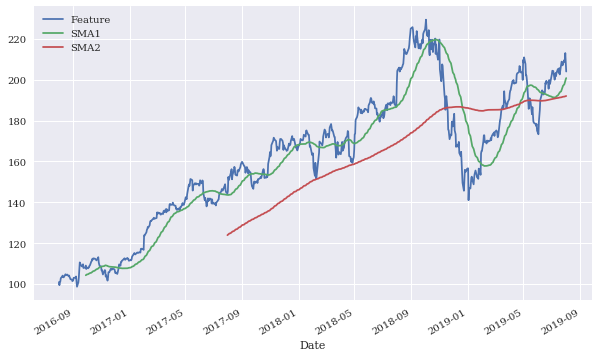

In [35]:
sma1=42
sma2=252
data['SMA1']=data.Feature.rolling(sma1).mean()
data['SMA2']=data.Feature.rolling(sma2).mean()
data.plot(figsize=(10,6))